# **Diamond Price Prediction 💎**

### By - Uday Singh From TY B.sc IT  
#### B.K. Birla College Kalyan , "Empowered Autonomous Status"




# Setup


Libraries that were used in the project


*   `pandas` for managing the data.
*   `numpy`for mathematical operations.
*   `sklearn` for machine learning and machine-learning-pipeline related functions.
*   `seaborn` for visualizing the data.
*   `matplotlib` for additional plotting tools.
*   `mercury` for building a web app.


### Importing Required Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=False)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="numpy")
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

---


# Data Loading and Preprocessing

1. Load the dataset into a pandas DataFrame.
2. Data preprocessing including:
    - Remove unnecessary columns like index and dimensions.
    - Convert categorical features (cut, color, clarity) into numerical representations.
    - Calculate correlation coefficients and visualize them using a heatmap.
3. Feature visualization
4. Data splits and handle outliers using Isolation Forest



There are 10 attributes included in the dataset including the target ie. price.

Feature description:
- price price in US dollars (\$326--\$18,823)
- carat weight of the diamond (0.2--5.01)
- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color diamond colour, from J (worst) to D (best)
- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x length in mm (0--10.74)
- y width in mm (0--58.9)
- z depth in mm (0--31.8)
- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table width of top of diamond relative to widest point (43--95)


In [2]:
# Load the dataset into a DataFrame
df = pd.read_csv("Diamond.csv")

df.head()

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(f"""The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.""")

The DataFrame has 53940 rows and 11 columns.


### Remove Unnecessary Data
The first column seems uncessary as its just index so we can remove it

In [4]:
df = df.drop(["s"], axis=1)

In [5]:
df = df.drop(["x","y",'z'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


## Convert categorical features (e.g., 'cut', 'color', 'clarity') to numerical


In [6]:
df["cut"] = df["cut"].map({"Ideal": 1, "Premium": 2, "Good": 3, "Very Good": 4, "Fair": 5})
df["color"] = df["color"].map({"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7})
df["clarity"] = df["clarity"].map({"IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "I1": 8})

df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,1,2,7,61.5,55.0,326
1,0.21,2,2,6,59.8,61.0,326
2,0.23,3,2,4,56.9,65.0,327
3,0.29,2,6,5,62.4,58.0,334
4,0.31,3,7,7,63.3,58.0,335


In [7]:
df.describe()

,carat,cut,color,clarity,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.228940,3.594197,4.948980,61.749405,57.457184,3932.799722
std,0.474011,1.265976,1.701105,1.647136,1.432621,2.234491,3989.439738
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000
25%,0.400000,1.000000,2.000000,4.000000,61.000000,56.000000,950.000000
50%,0.700000,2.000000,4.000000,5.000000,61.800000,57.000000,2401.000000
75%,1.040000,4.000000,5.000000,6.000000,62.500000,59.000000,5324.250000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000


## Correlation Analysis
Calculating the correlation coefficients between the features and the target variable (price).Positive values indicate a positive correlation, and negative values indicate a negative correlation.


In [8]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_target)

price      1.000000
carat      0.921591
color      0.172511
clarity    0.146800
table      0.127134
cut        0.049421
depth     -0.010647
Name: price, dtype: float64


### Visualize Correlations
This helps identify features with strong correlations (both positive and negative) with the target variable.


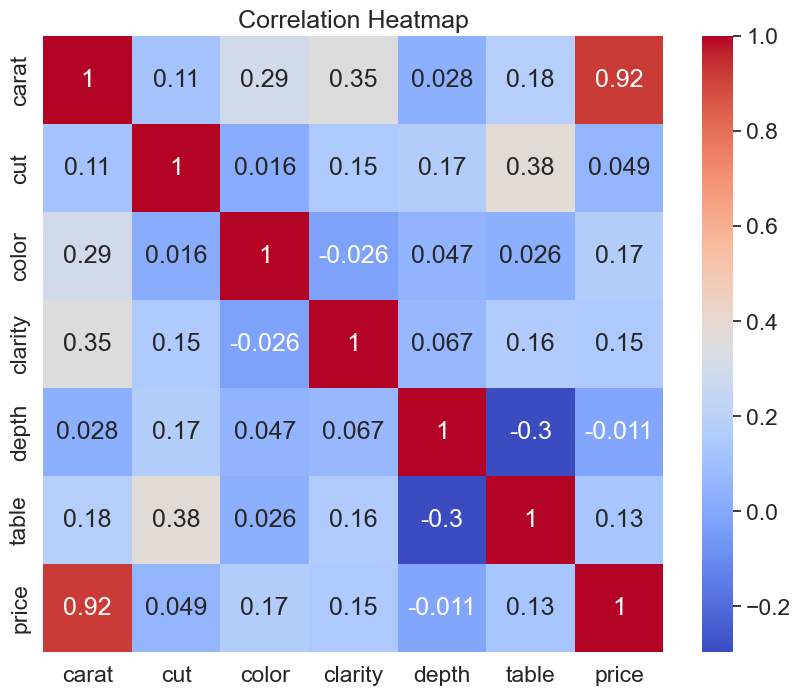

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [10]:
df = df.drop(["cut", "depth", "table"], axis=1)
df.head()

,carat,color,clarity,price
0,0.23,2,7,326
1,0.21,2,6,326
2,0.23,2,4,327
3,0.29,6,5,334
4,0.31,7,7,335


## Task 3: Feature Visualization 


Int64Index([6, 5, 7, 4, 3, 2, 1, 8], dtype='int64') [13065, 12258, 9194, 8171, 5066, 3655, 1790, 741]


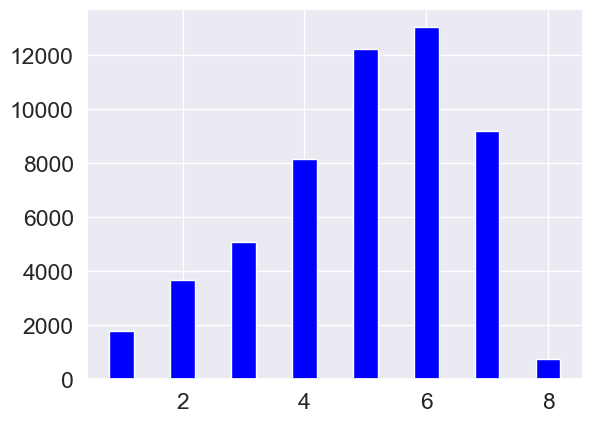

In [13]:
x=df['clarity'].value_counts().index
y=df['clarity'].value_counts().values.tolist()
print(x,y)
plt.bar(x, y, color ='blue',width = 0.4)

plt.show()

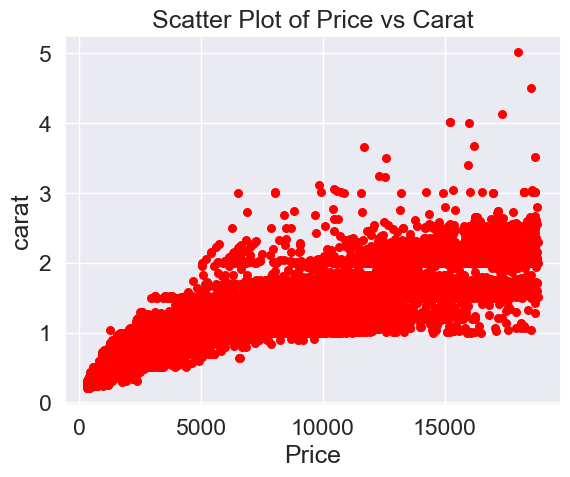

In [14]:
x = df['price']
y=df['carat']
plt.scatter(x, y, c="red", marker="o", s=30)
plt.xlabel("Price")
plt.ylabel("carat")
plt.title("Scatter Plot of Price vs Carat")
plt.show()

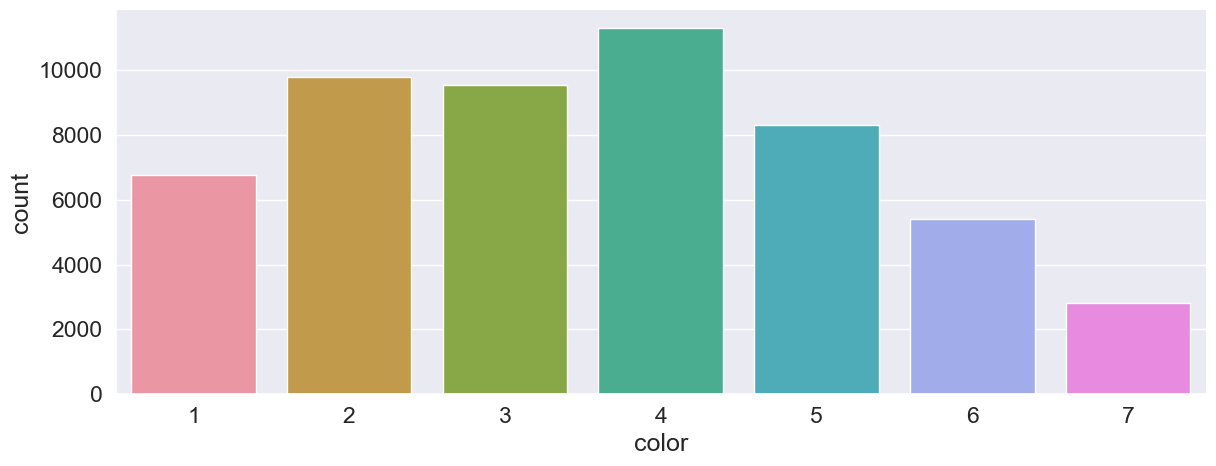

In [18]:
p = sns.catplot(x='color', data=df , kind='count',aspect=2.5 )

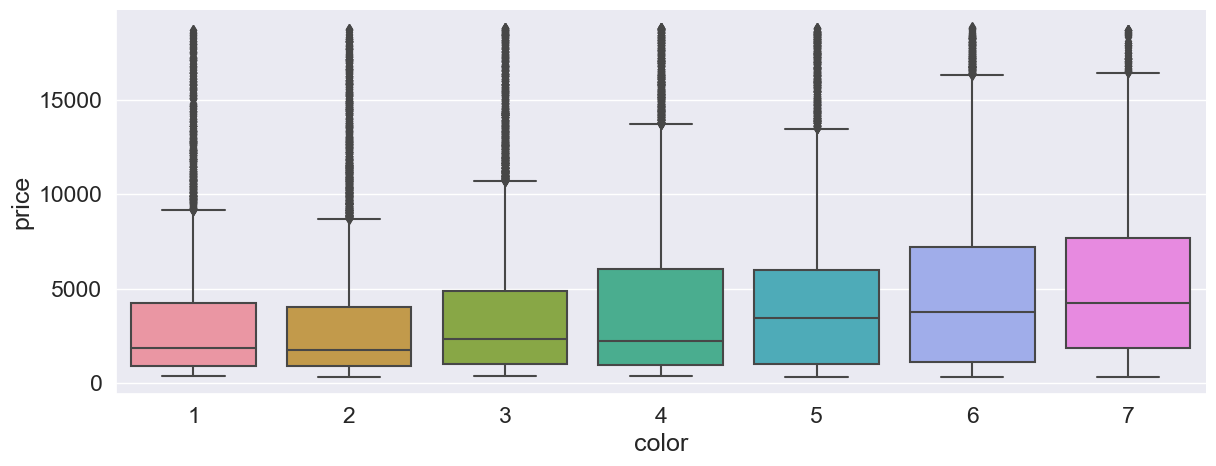

In [19]:
p = sns.catplot(x='color', y='price', data=df, kind='box' ,aspect=2.5 )

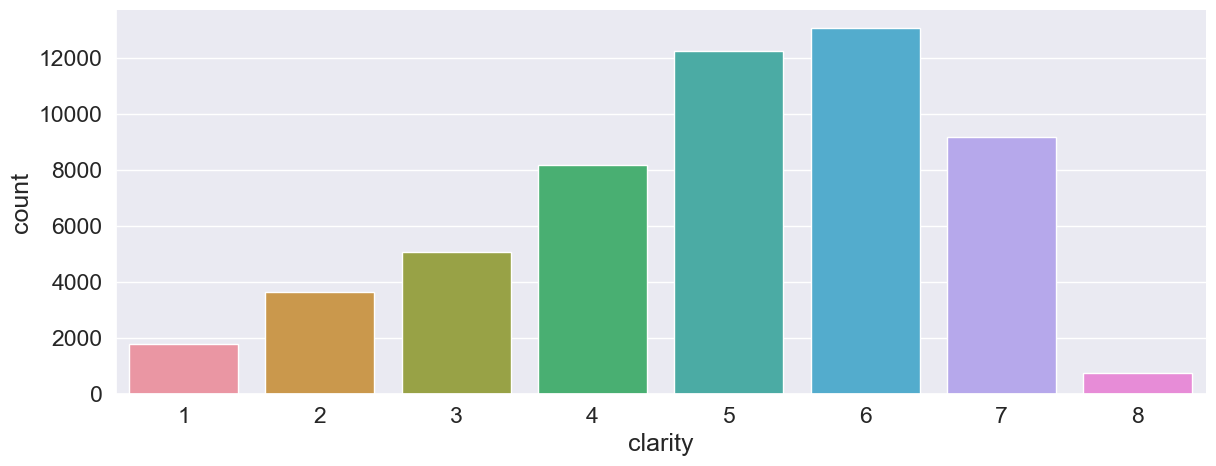

In [20]:
p = sns.catplot(x='clarity', data=df , kind='count',aspect=2.5 )

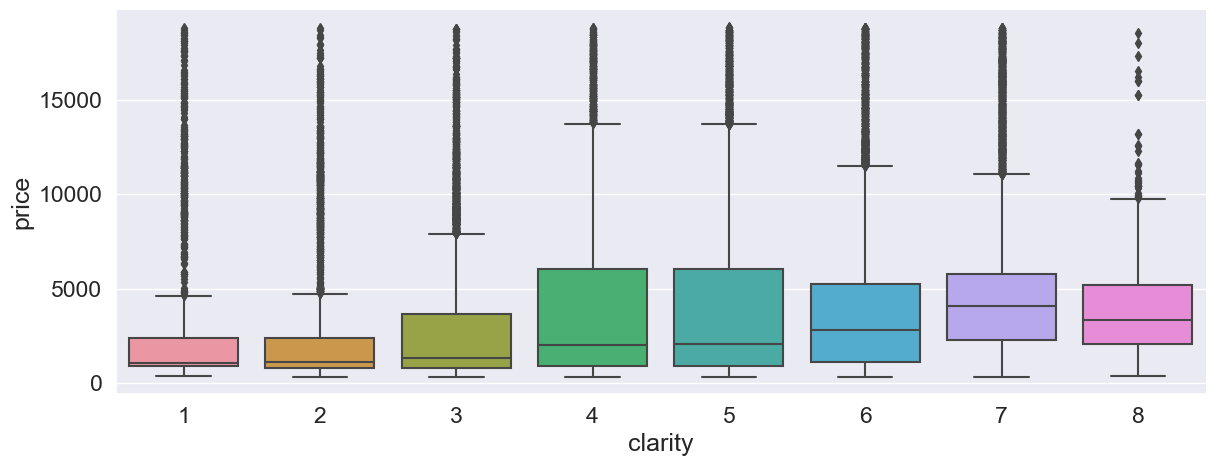

In [21]:
p = sns.catplot(x='clarity', y='price', data=df, kind='box' ,aspect=2.5)

## Task 4: Data Splits and Handle Outliers Using Isolation Forest


In [34]:
# Split the data into features (X) and target (y)
X = df.drop(["price"], axis=1)
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)

# Check the shape of the training dataset
print("Shape of training data - X_train:", X_train.shape)
print("Shape of training data - y_train:", y_train.shape)

Shape of training data - X_train: (43152, 3)
Shape of training data - y_train: (43152,)


In [35]:
iso = IsolationForest(contamination=0.1, random_state=42)
outlier_predictions_train = iso.fit_predict(X_train)

non_outlier_mask = outlier_predictions_train != -1
X_train, y_train = X_train.loc[non_outlier_mask], y_train.loc[non_outlier_mask]

print("Shape of updated training data - X_train:", X_train.shape)
print("Shape of updated training data - y_train:", y_train.shape)

Shape of updated training data - X_train: (38836, 3)
Shape of updated training data - y_train: (38836,)


---


#  Building Models To Predict Diamond Prices

- **Linear Regression:** This algorithm establishes a linear relationship between the input features and the target variable, aiming to predict numeric values.

- **Lasso Regression:** Similar to linear regression, this technique adds a penalty term to the model's cost function, encouraging the selection of only the most influential features and preventing overfitting.

- **AdaBoost Regression:** This boosting algorithm constructs a strong predictive model by combining the outputs of several weak models in an iterative manner.

- **Ridge Regression:** Like linear regression, ridge regression aims to predict outcomes. However, it introduces L2 regularization to manage multicollinearity and enhance model stability.

- **Gradient Boosting Regression:** This ensemble method constructs a powerful model by sequentially refining weak learners, emphasizing previously misclassified instances.

- **Random Forest Regression:** Another ensemble technique, random forest regression, creates multiple decision trees and aggregates their predictions to provide robust and accurate results.

- **KNeighbours Regression:** This instance-based algorithm predicts outcomes by considering the outcomes of nearby data points in the feature space.


In [36]:
# Collect all R2 scores
R2_scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'Gradient Boosting Regression',
          'Random Forest Regression' ,
         'KNeighbours Regression']

## Linear Regression


In [37]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 853.595
Mean Squared Error: 1583110.768
R-squared Score: 0.900


In this case, an R-squared score of approximately 0.901 suggests that about 90% of the variance in diamond prices can be explained by the linear regression model.


## Lasso Regression 


In [38]:
# Create and train the Lasso regression model
clf_la = Lasso()
clf_la.fit(X_train , y_train)

y_pred = clf_la.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 852.983
Mean Squared Error: 1583320.277
R-squared Score: 0.900


In this case, an R-squared score of approximately 0.901 suggests that about 90% of the variance in diamond prices can be explained by the Lasso regression model.


## AdaBoost Regression


In [39]:
clf_ar = AdaBoostRegressor()
clf_ar.fit(X_train , y_train)

y_pred = clf_ar.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 717.639
Mean Squared Error: 1072683.554
R-squared Score: 0.933


In this case, an R-squared score of approximately 0.934 suggests that about 93% of the variance in diamond prices can be explained by the AdaBoost regression model.


## Ridge Regression 


In [40]:
clf_rr = Ridge()
clf_rr.fit(X_train , y_train)

y_pred = clf_rr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 853.481
Mean Squared Error: 1583098.152
R-squared Score: 0.900


In this case, an R-squared score of approximately 0.901 suggests that about 90% of the variance in diamond prices can be explained by the Ridge regression model.


## Gradient Boosting Regression


In [41]:
clf_gbr = GradientBoostingRegressor()
clf_gbr.fit(X_train , y_train)

y_pred = clf_gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 380.941
Mean Squared Error: 578485.420
R-squared Score: 0.964


In this case, an R-squared score of approximately 0.965 suggests that about 97% of the variance in diamond prices can be explained by the Gradient Boosting regression model.


## Random Forest Regression 


In [42]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)

y_pred = clf_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 362.345
Mean Squared Error: 574455.035
R-squared Score: 0.964


In this case, an R-squared score of approximately 0.962 suggests that about 96% of the variance in diamond prices can be explained by the Random Forest regression model.


## KNeighbours Regression 


In [43]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)

y_pred = clf_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 568.358
Mean Squared Error: 2132063.093
R-squared Score: 0.866


In this case, an R-squared score of approximately 0.867 suggests that about 87% of the variance in diamond prices can be explained by the KNeighbours regression model.


## R2-Score Visualization


In [44]:
compare = pd.DataFrame({'Algorithms' : models , 'R2 Scores' : R2_scores})
compare.sort_values(by='R2 Scores' ,ascending=False).style.background_gradient(cmap="Reds")

,Algorithms,R2 Scores
5,Random Forest Regression,0.963864
4,Gradient Boosting Regression,0.963610
2,AdaBoost Regression,0.932522
3,Ridge Regression,0.900414
0,Linear Regression,0.900413
1,Lasso Regression,0.900400
6,KNeighbours Regression,0.865881


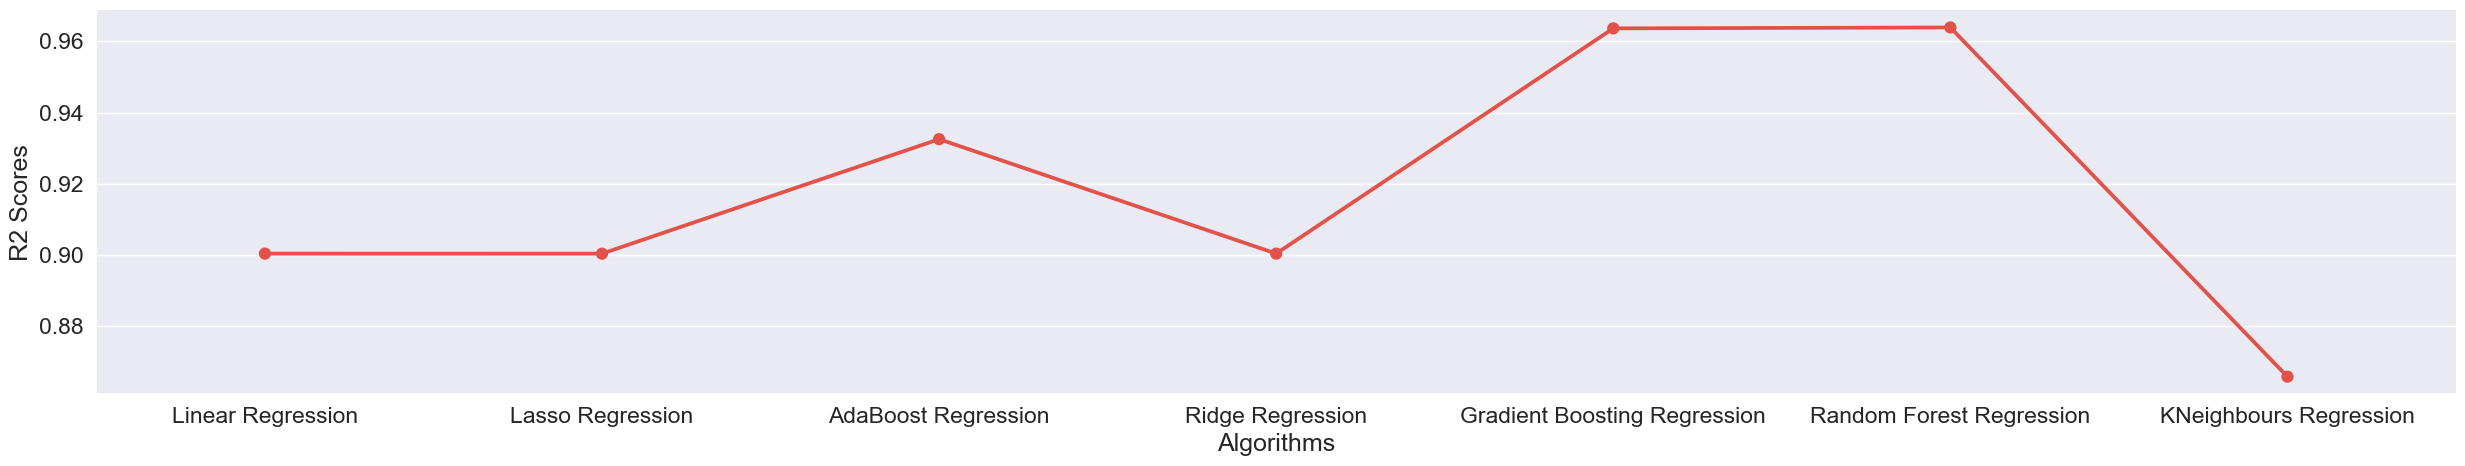

In [45]:
sns.catplot(x='Algorithms', y='R2 Scores' , data=compare, kind='point', aspect=5)

Since the Gradient Boosting Algorithm has achieved the highest R2 score among all the models, we will exclusively employ this model for the subsequent diamond price prediction.


# Diamond Price Prediction


In [46]:
def predict_price(carat, color, clarity):
    # Map user inputs to the format used in the DataFrame
    color_mapping = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}
    clarity_mapping = {"IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "I1": 8}
    
    # Create a DataFrame with user inputs
    user_data = pd.DataFrame({
        'carat': [carat],
        'color': [color_mapping[color]],
        'clarity': [clarity_mapping[clarity]]
    })
    
    # Use the trained model to predict the price
    predicted_price = clf_rf.predict(user_data)[0]  
    
    return predicted_price


In [47]:
carat_input = 0.21
color_input = "D" 
clarity_input = "VS1"  
predicted_price = predict_price(carat_input, color_input, clarity_input)
print(f"The predicted price is: {predicted_price}")


The predicted price is: 391.73733333333337


In [48]:
import pickle

In [49]:
pickle.dump(clf_rf,open('diamond','wb'))

In [50]:
model_load=pickle.load(open('diamond','rb'))

In [33]:
model_load.predict(X_test)

array([ 527.37149387, 2365.21612854, 1101.71643345, ...,  850.51660464,
       9598.57252375, 3870.71016883])

In [53]:
import pickle

# Assuming your model is stored in a variable named 'model'
# Fit your model and do whatever pre-processing is necessary

# Save the model to a .pkl file
with open('Diamond.pkl', 'wb') as file:
    pickle.dump(clf_rf, file)


In [54]:
import joblib

# Assuming you have X_train and y_train for training
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(clf_rf, 'diamond_price_predictor_model.pkl')


['diamond_price_predictor_model.pkl']